# 🌎Global Power plant  Database🌎

### The Global Power Plant Database is an open-source open-access dataset of grid-scale (1 MW and greater) electricity generating facilities operating across the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 30,000 power plants from 164 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
          

![global](https://4.bp.blogspot.com/-j775pVnvrv8/XHexhYJW3EI/AAAAAAAA4lE/NYX7FMNJZWY9Eyyjv2GsrA8c_A4DCwPnACLcBGAs/s523/three.jpg)

<h2><center>Key attributes of the database</center></h2>

<h3><center>The database includes the following indicators:</center></h3>

Property Key  | Field Description
------------- | -------------
    `country` | 3 character country code corresponding to the ISO 3166-1 alpha-3 specification
`country_long`| longer form of the country designation
      `name`  |name or title of the power plant, generally in Romanized form
  `gppd_idnr` |10 or 12 character identifier for the power plant
`capacity_mw` |electrical generating capacity in megawatts
`latitude`    |geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude`   |geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel`|energy source used in primary electricity generation or export
`other_fuel1` |energy source used in electricity generation or export
`other_fuel2` |energy source used in electricity generation or export
`other_fuel3` |energy source used in electricity generation or export
 `commissioning_year`|year of plant operation, weighted by unit-capacity when data is available
`owner`  | majority shareholder of the power plant, generally in Romanized form
`source` | entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url`    |web document corresponding to the `source` field
`geolocation_source`    |attribution for geolocation information
              `wepp_id` |a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` |year the capacity information was reported
`generation_gwh_2013` | electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` | electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` | electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` |electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` | electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` | electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` | electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` |attribution for the reported generation information
`estimated_generation_gwh_2013` |estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` | estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` | estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` | estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` | estimated electricity generation in gigawatt-hours for the year 2017 
`estimated_generation_note_2013` | label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` | label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` | label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` | label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` | label of the model/method used to estimate generation for the year 2017 

# Problem Definition

### This project aims to build define the "Fuel Type" attribute of our database based on common fuel categories and "Megawatts Capacity" based on electrical generating capacity in megawatts.
#### We will make two model prediction with below target variable:
1) primary_fuel	    
2) capacity_mw 

# Model 1:  "primary_fuel" is a target variable

In [37]:
# import all necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Collection and Information

In [3]:
# Load the dataset
df=pd.read_csv("database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
# check the shape of the dataset
df.shape

(908, 25)

# Exploratory Data Analysis

In [5]:
#dataset information of column name, missing values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

- Float data type ----> capacity_mw, latitude, longitude, other_fuel3, commissioning_year, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, estimated_generation_gwh.

- object datatypes ----> country, country_long, name, gppd_idnr, primary_fuel, other_fuel1, other_fuel2, owner, source, url, geolocation_source, generation_data_source

- all are independent variable accept primary_fuel. primary_fuel are target variable.

In [6]:
# checking for any null values present

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

#### We have more than 70% missing values in our dataset we will drop these columns also we will drop id , owner , name , url , country and data_source which has no effect on our target parsing even after dropping

### Visualization of null values

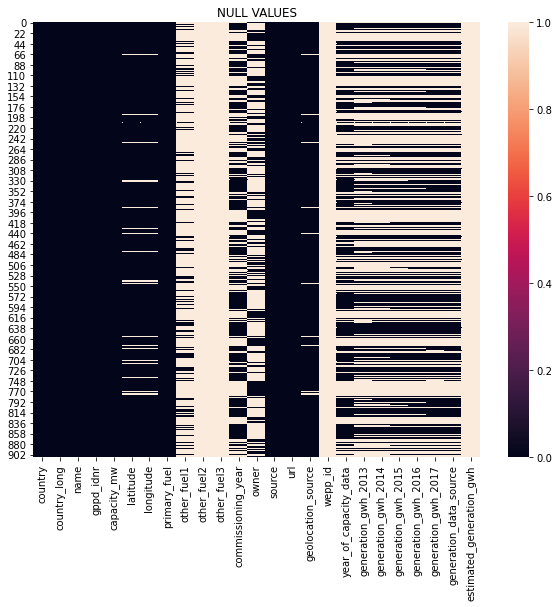

In [7]:
plt.figure(figsize=[10,8])
sn.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

####  White line shows Null values in data set.

In [8]:
# Duplicate data
df.duplicated().sum()

0

#### No Duplicate Data

In [9]:
# let's fill the continous column with the mean.
df=df.fillna(df.mean())

# check for any null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [10]:
# check for value counts of geolocation source
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [11]:
# check for value counts of other_fuel1
df.other_fuel1.value_counts()
df.other_fuel1=df.other_fuel1.fillna('Oil')
df.other_fuel1.value_counts()

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [12]:
# check for any null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [13]:
# more than 70% data is missing, we will drop the columns 
#owner column has more than 60% of null values, and it may not required for prediction also, we can drop this column
#other_fuel2 contains only one entry
#other_fuel3 contains 0 entries 

df.drop(['estimated_generation_gwh','generation_data_source','wepp_id','owner','other_fuel1','other_fuel3','other_fuel2'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1996.876894,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,1996.876894,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [14]:
# check for unique value of country
df['country'].unique()

array(['IND'], dtype=object)

In [15]:
# check for value counts of country
df['country'].value_counts()

IND    908
Name: country, dtype: int64

In [16]:
## as shown in above country column is having all 908 similar values so we can drop that column

#drop country column 
df=df.drop(['country'], axis=1)

In [17]:
# check for unique value of country
df['country_long'].unique()

array(['India'], dtype=object)

In [18]:
# check for value counts of country
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [19]:
## as shown in above country_long column is having all 908 similar values so we can drop that column

#drop country_long column 
df=df.drop(['country_long'], axis=1)

In [20]:
# check for value counts of name
df['name'].value_counts()

VALUTHUR GT                              1
KALINADI                                 1
BARAMURA                                 1
NAGPUR MILL                              1
Askandra - Finehope Solar Power Plant    1
                                        ..
RAIGARH TPP                              1
VIJAIPUR WORKS                           1
Gadag Wind Farm                          1
Lalpur Wind Farm                         1
Bap - GIS 3 Solar Power Plant            1
Name: name, Length: 908, dtype: int64

In [21]:
#drop name column 
df=df.drop(['name'], axis=1)

In [22]:
# check for value counts of gppd_idnr
df['gppd_idnr'].value_counts()

IND0000208    1
IND0000173    1
WRI1019901    1
IND0000101    1
WRI1026176    1
             ..
IND0000525    1
IND0000085    1
IND0000508    1
IND0000313    1
WRI1019970    1
Name: gppd_idnr, Length: 908, dtype: int64

In [23]:
#drop gppd_idnr column 
df=df.drop(['gppd_idnr'], axis=1)

In [24]:
# check for value counts of geolocation source
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [25]:
# we have geolocation_source having null values which is of type category
# we will fill mode values of the column geolocation_source 
df['geolocation_source']=df['geolocation_source'].fillna("WRI")

In [26]:
# Now check the dataset for any null values
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

#### We can now proceed, as we don't have any missing values in our dataset!

In [27]:
#Stats of the dataset

df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,12.994825,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1996.876894,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2003.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [28]:
# column url is not contributing to prediction, we will drop this column as well
# "year_of_capacity_data" it is having same entries through out, we can drop this column also
# let's dropping these columns beacuse they won't be impacted

df.drop(['year_of_capacity_data','geolocation_source','url'],axis=1,inplace=True)

In [29]:
# Value count of the commissioning_year
df["commissioning_year"].value_counts()

1996.876894    380
2013.000000     28
2015.000000     26
2012.000000     23
2016.000000     21
              ... 
1949.000000      1
1958.000000      1
1954.000000      1
1956.000000      1
1927.000000      1
Name: commissioning_year, Length: 74, dtype: int64

In [30]:
#lets use commissioning_year to know how old the power plant is and make a column Power_plant_Years
df['Power_plant_Years'] = 2018 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)


In [31]:
# check target variable and encode that to visualize data

df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [32]:
df["primary_fuel"].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [33]:
#import label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["primary_fuel"] = le.fit_transform(df["primary_fuel"].values.reshape(-1,1))
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [59]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [60]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_Years
0,2.5,28.1839,73.2407,6,109,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7.000000
1,98.0,24.7663,74.6090,1,174,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
2,39.2,21.9038,69.3732,7,21,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
3,135.0,23.8712,91.3602,2,22,631.777928,617.789264,843.747000,886.004428,663.774500,14.000000
4,1800.0,21.9603,82.4091,1,22,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.000000


# EDA Concluding Remarks

1. There are 908 rows and 14 columns.
2. Dataset has more than 70% of null values in many columns which is replaced by mean and mode values.
3. Most of the features in the dataset is of the type float and three of them are of the type Object.
4. Dataset has many features that are skewed.
5. we have dropped some columns since it makes no difference in our model building.

# Data Visualization

#### Univariate Analysis

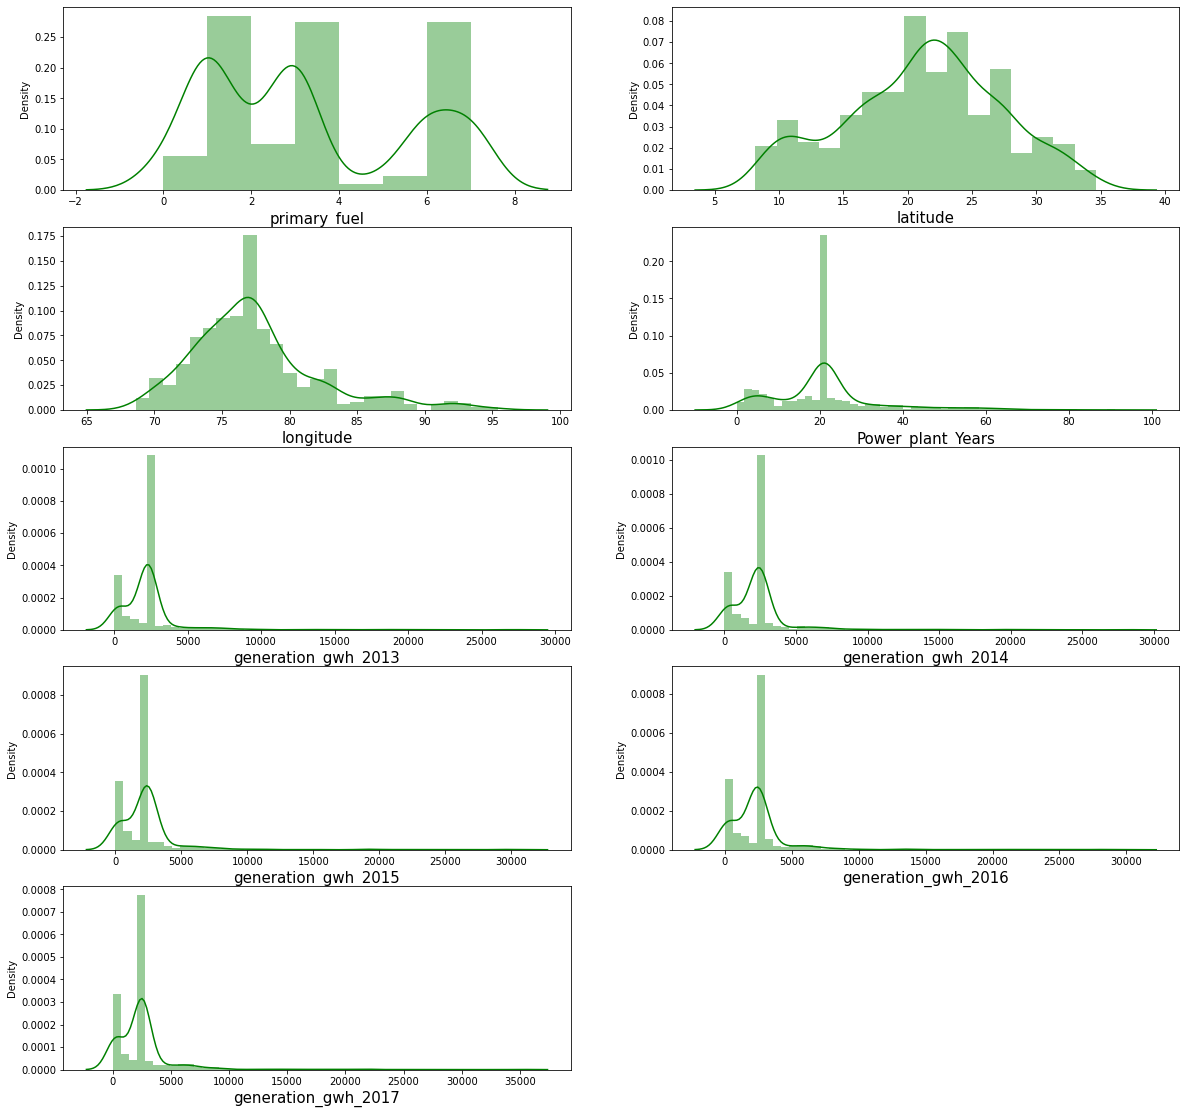

In [35]:
feat = df[['primary_fuel','latitude','longitude','Power_plant_Years', 'generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

#Relationship Visualizing

plt.figure(figsize = (20,60))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(15,2,plotnumber)
        sn.distplot(feat[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### Almost all the column has skewness

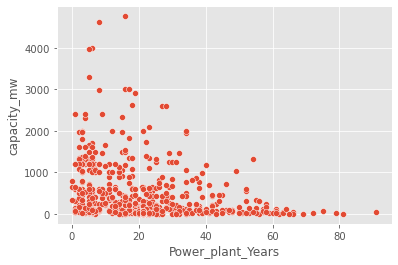

In [38]:
#lets see how plant age affects capacity_mw
plt.style.use('ggplot')
sns.scatterplot(x = "Power_plant_Years", y = "capacity_mw", data = df)
plt.show()

#### From the above plot, we can say that older powerplants has lower capacity_mw compared to plants which have started recently.

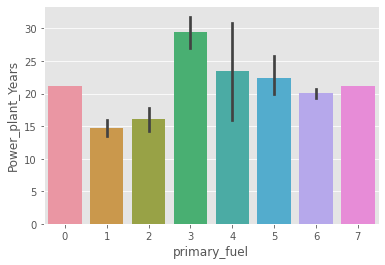

In [39]:
#lets have a look on relation between fuel used and powerplant age
sns.barplot(x = "primary_fuel", y = "Power_plant_Years", data = df)
plt.show()

1. From the graph above, we can say that most older plants use biomass, solar and wind energy to generate electricity.
2. And recently commissioned power plants use coal, gases and nuclear energy to generate electricity.

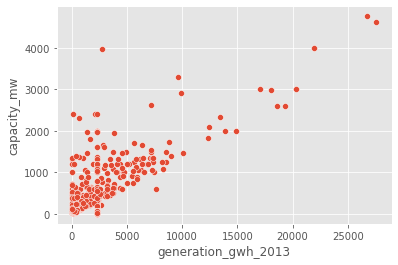

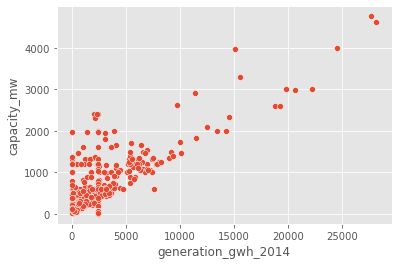

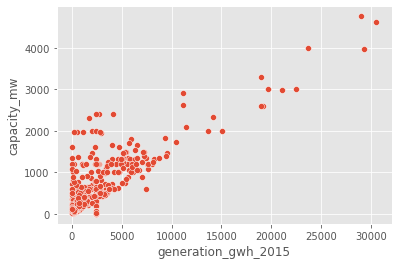

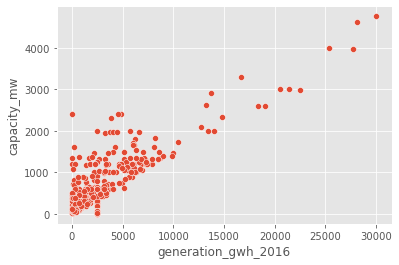

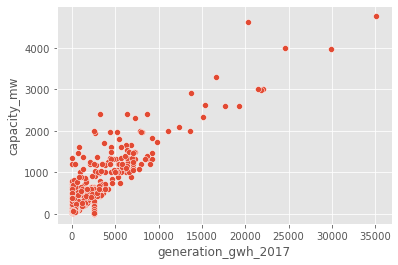

In [40]:
#lets have a look on generation_gwh_2013, generation_gwh_2014generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 vs capacity_mw
generation = ['generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

for i in generation:
    sns.scatterplot(x = i, y = 'capacity_mw', data = df)
    plt.show()

#### From the above plot we can see:
1. generation_gwh_2013 power generation growth is more than 5000, capacity_mw is also above 1000MW.
2. generation_gwh_2014 is linearly related to capacity_mw and maximum generation growth is below 30000.
3. generation_gwh_2015 is linearly related to capacity_mw, and maximum generation growth is slightly more than 30000
4. generation_gwh_2016 is linearly related to capacity_mw, and maximum generation growth is close to 30000
5. Among these four year the maximumm generation growth is observed in generation_gwh_2017 that is around 35000.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

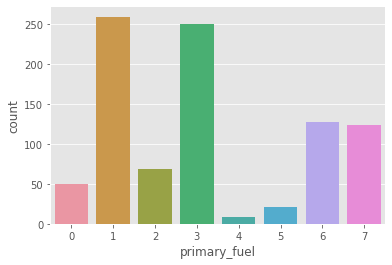

In [41]:
#check how primary fuel affects capacity_mw
sns.countplot(df["primary_fuel"])

- There are large number of hydro and coal power generation plants compared to others.
- Power plants using wind and solar energy are moderate in numbers.
- There are very less number of plants using Oil and nuclear energy to generate power

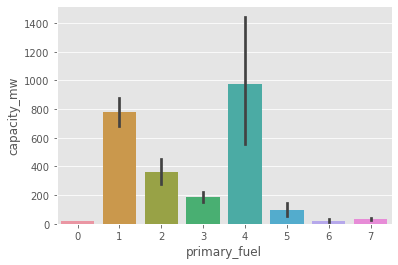

In [42]:
#Lets plot the bar plot for primary_fuel based on capaciy_mw
sns.barplot(x = 'primary_fuel', y = 'capacity_mw', data = df)
plt.show()

- From the above plot, we can see that the electricity generating capacity (capacity_mw) is high in case of Nuclear power plants, and coal power plants has capacity_mw next to it.

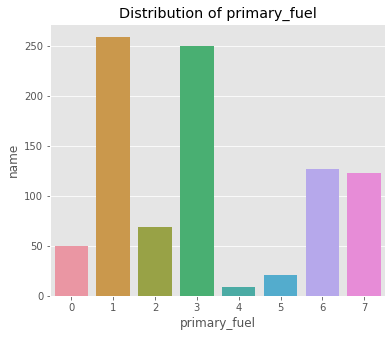

In [43]:
# Creating a barplot for 'Primary Fuel'
income = df['primary_fuel'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values)
plt.title('Distribution of primary_fuel')

plt.xlabel('primary_fuel')
plt.ylabel('name')

plt.show()

## Analysis through boxplot

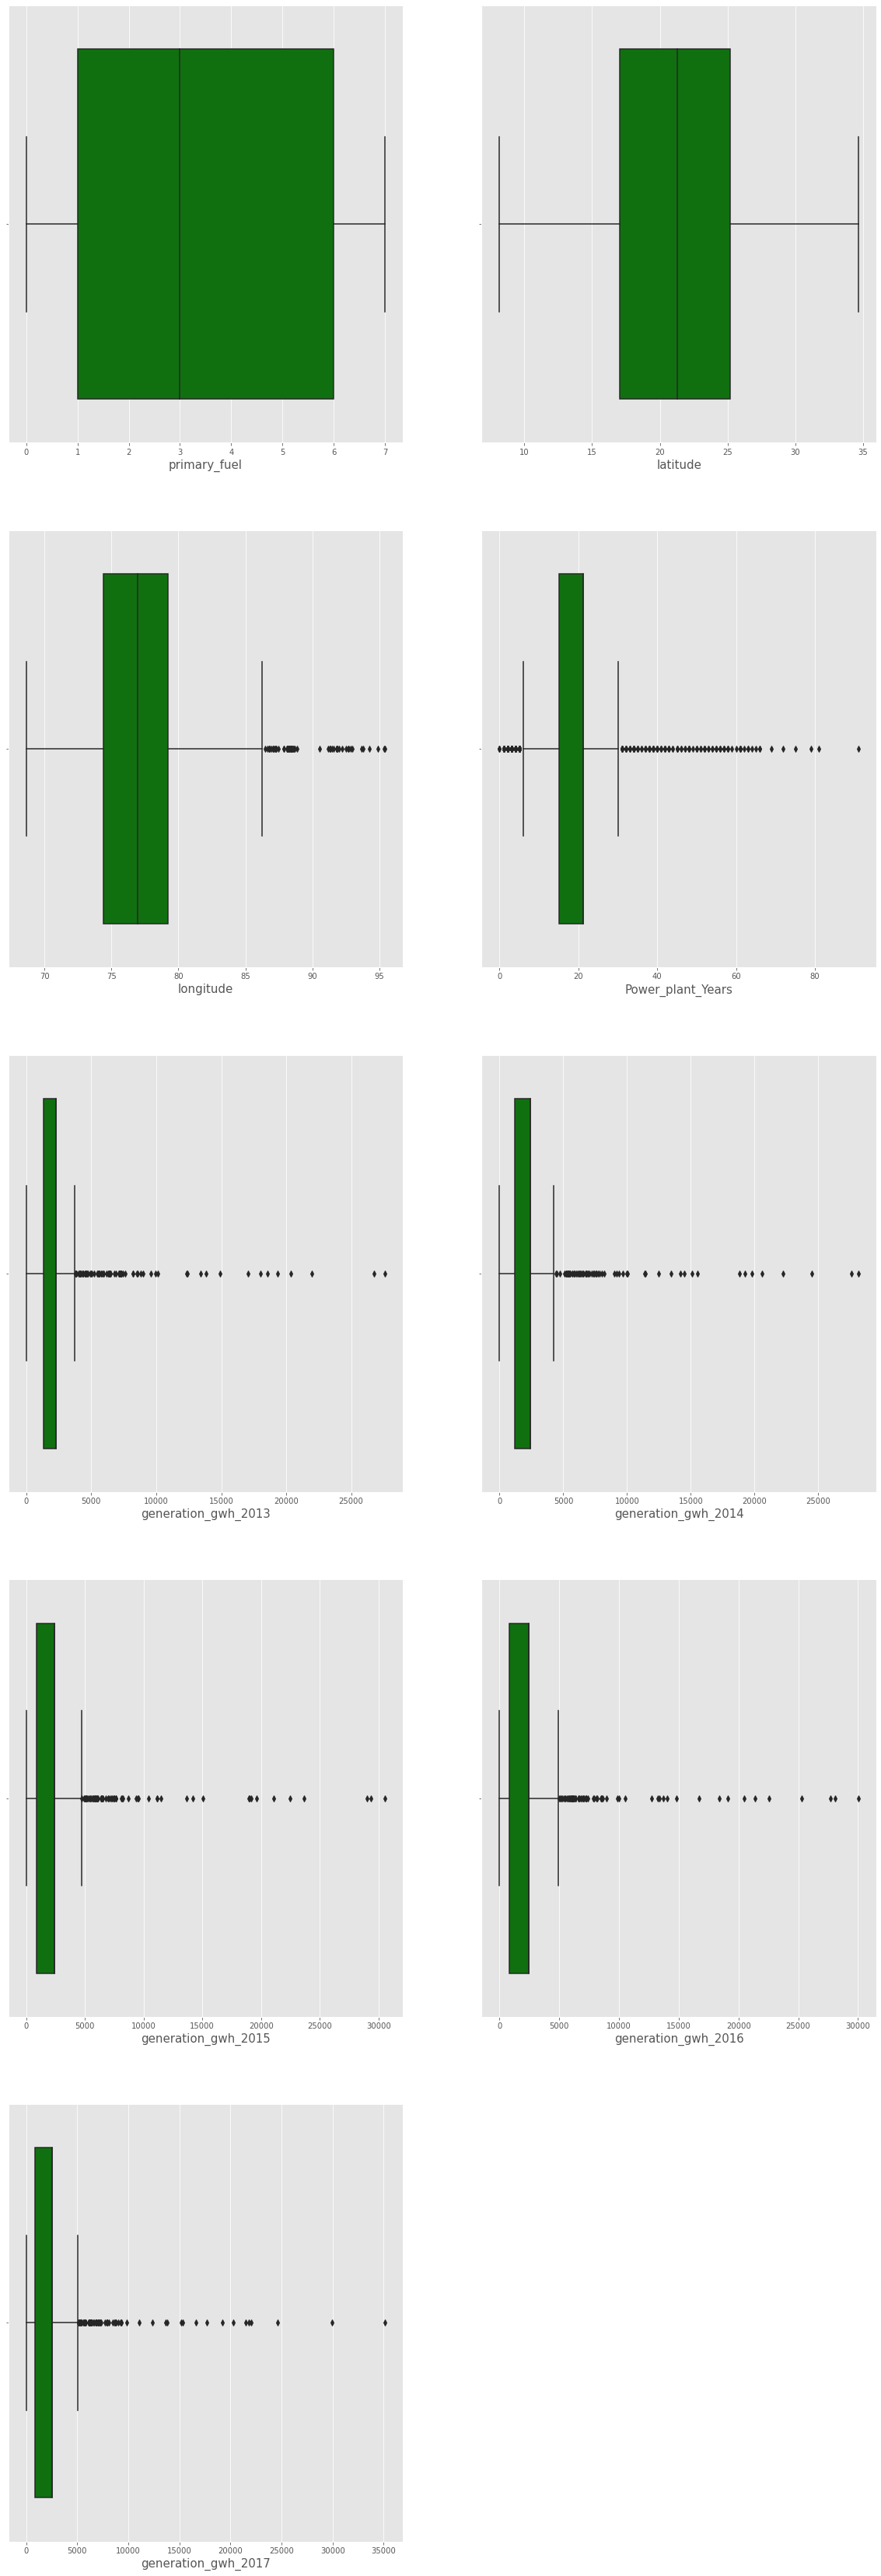

In [44]:
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in feat:
    if plotnumber <= 10: 
        ax = plt.subplot(5,2,plotnumber)
        sn.boxplot(feat[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### All the column contains Outliers.

## Analysis through histplot

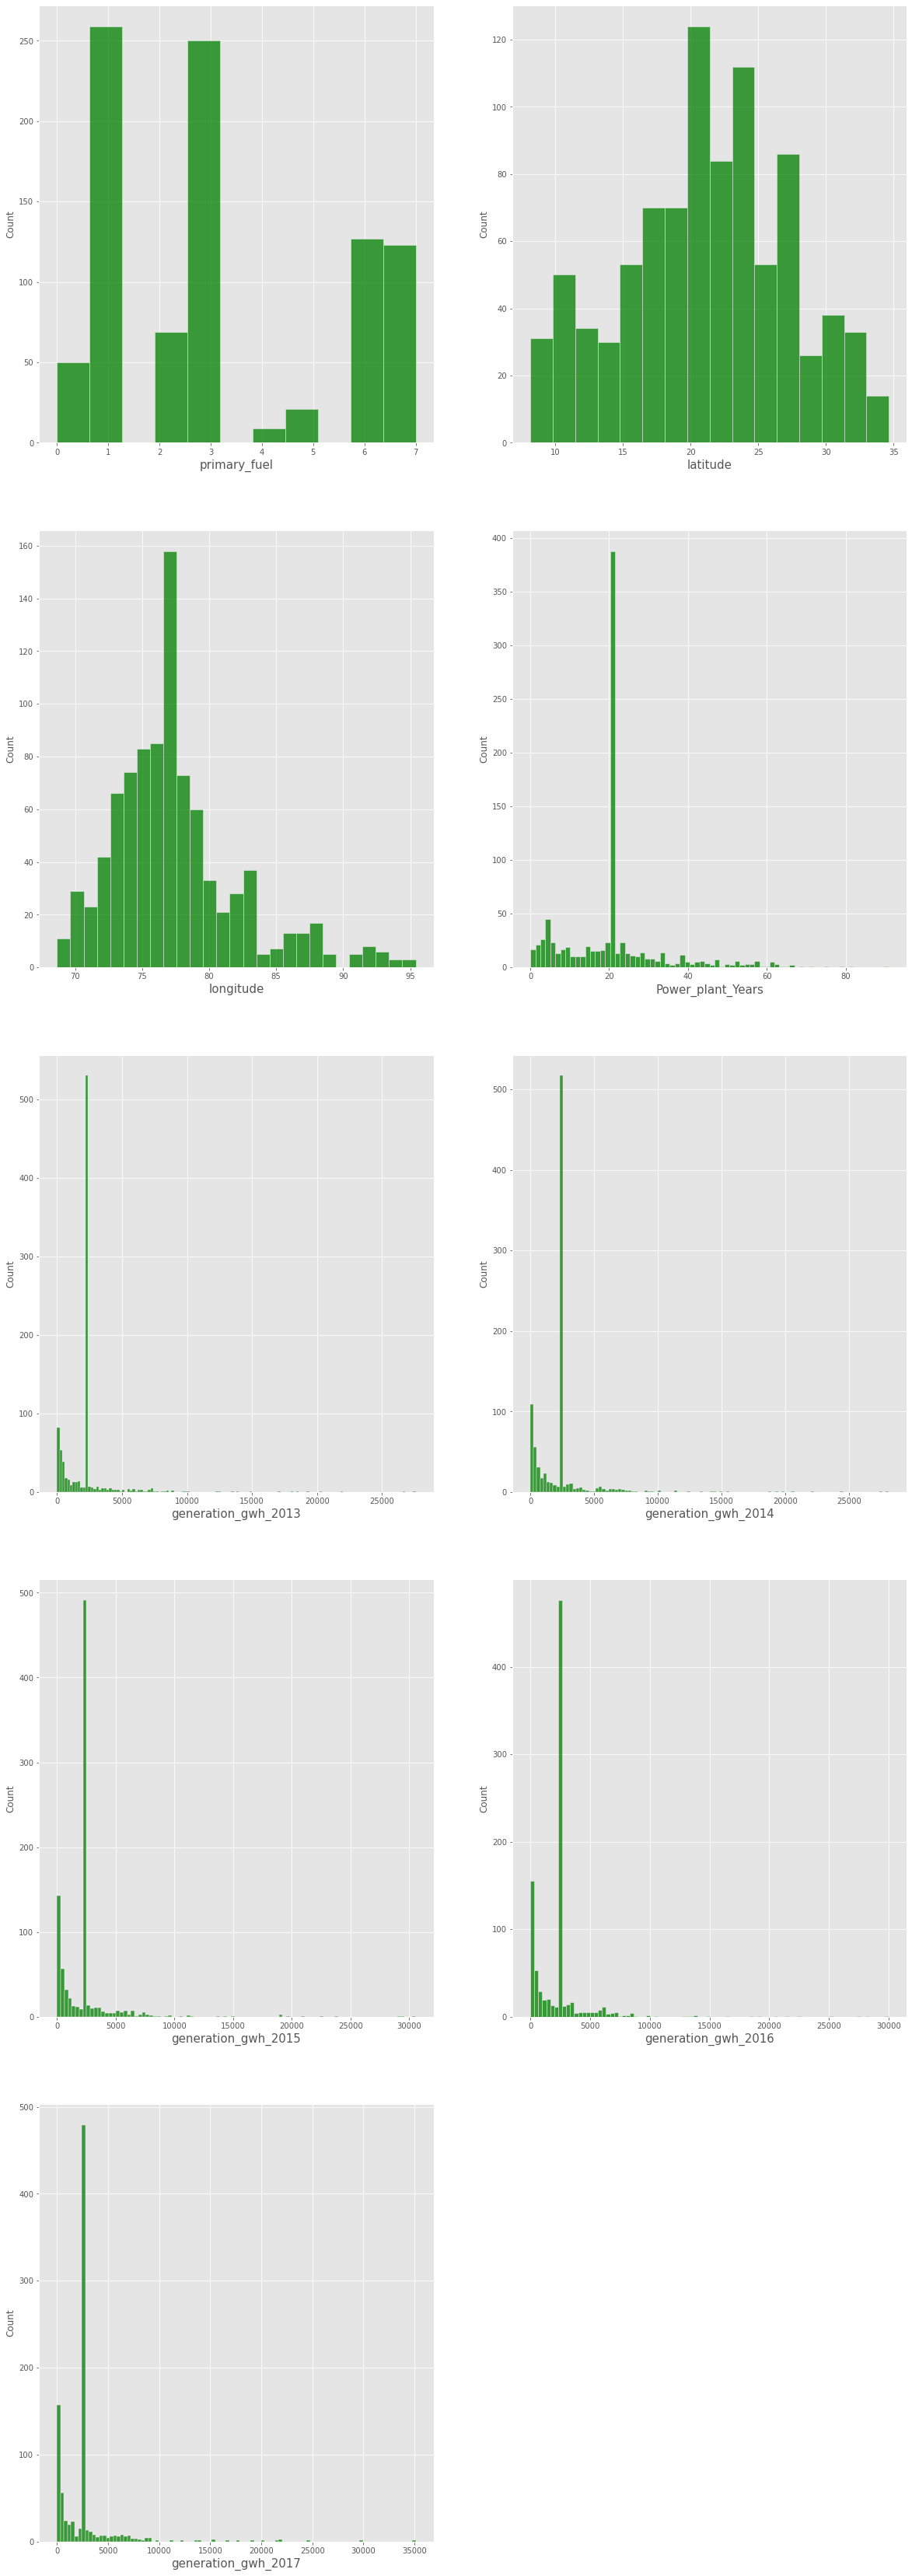

In [45]:
#Relationship Visualizing

plt.figure(figsize = (20,60))
plotnumber = 1

for column in feat:
    if plotnumber <= 10: # as we see there are twentyfive columns in the data
        ax = plt.subplot(5,2,plotnumber)
        sn.histplot(feat[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### Maximum column contains skewness

## Bi variate analysis

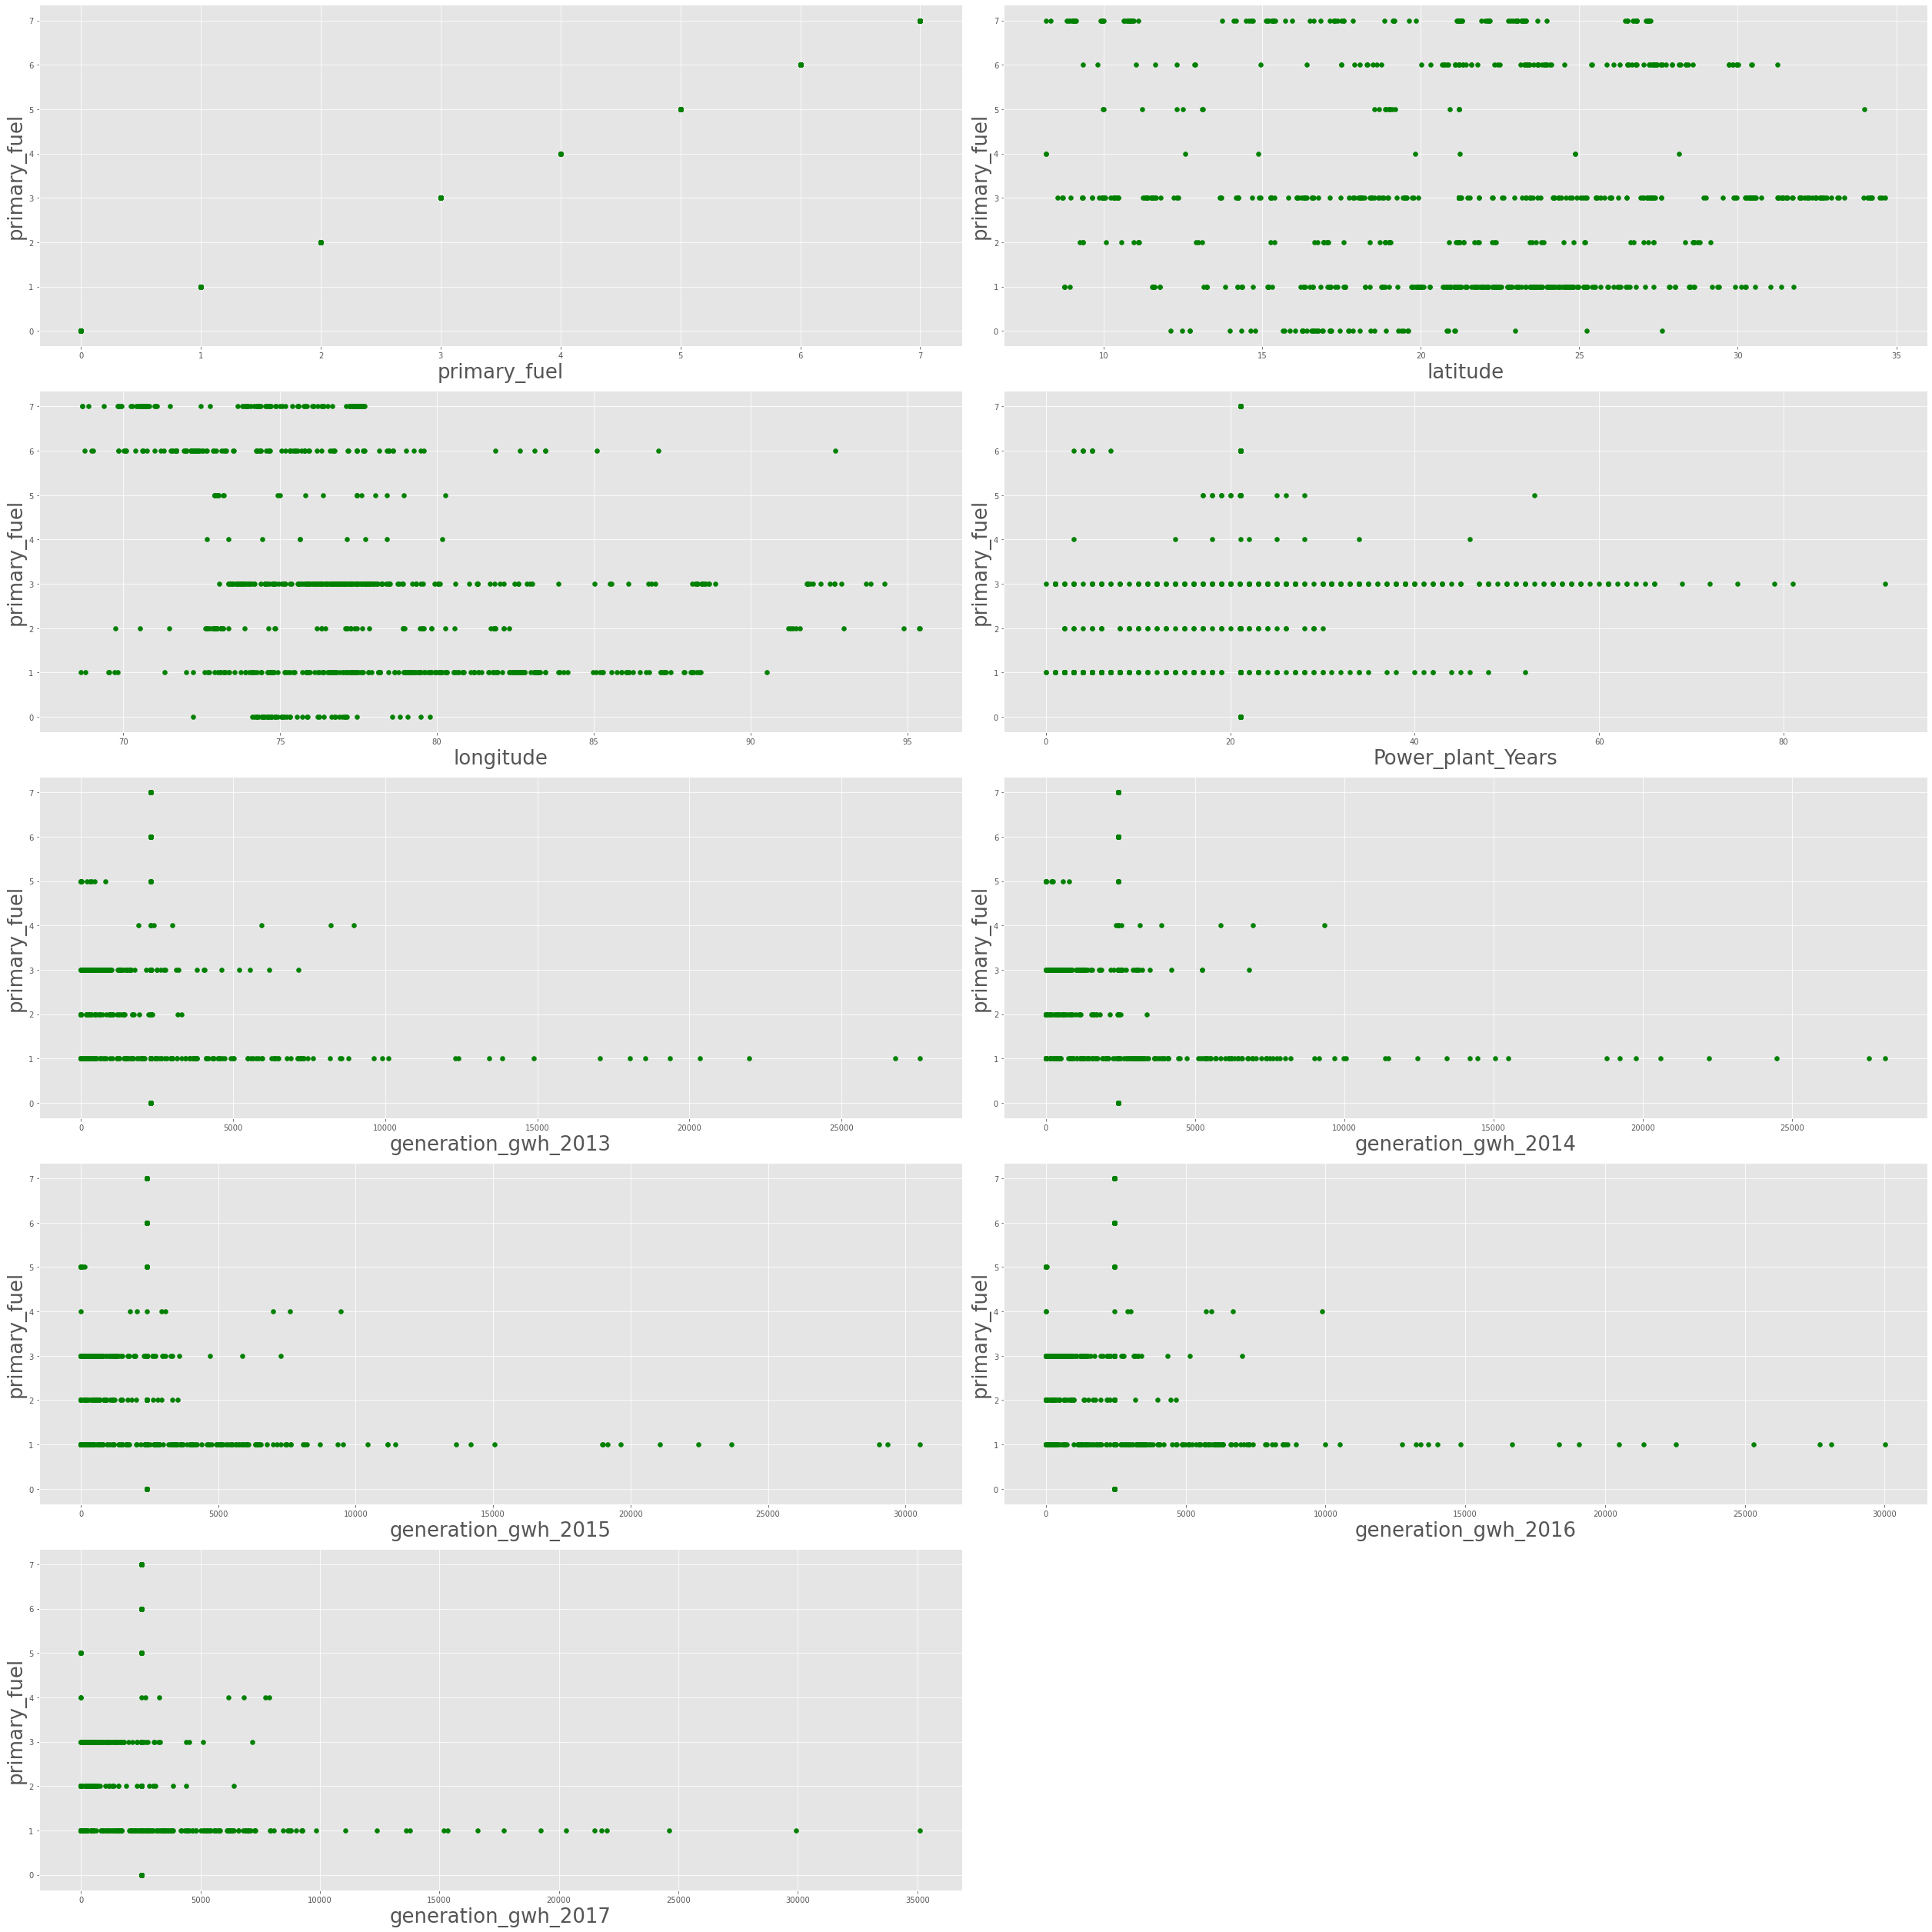

In [46]:
#Relationship Visualizing

plt.figure(figsize = (35,35), facecolor = 'white')
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(5,2,plotnumber)
        plt.scatter(feat[column],feat['primary_fuel'], color='g')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('primary_fuel', fontsize=26)
    plotnumber += 1
plt.tight_layout()

#### Some have Linear and some have non linear Relationship with target variable

## Multi Variate analysis
#### Multi variate analysis find the relationship with all variables. Now we will visualize the data and check the coiefficient of multicollinearity

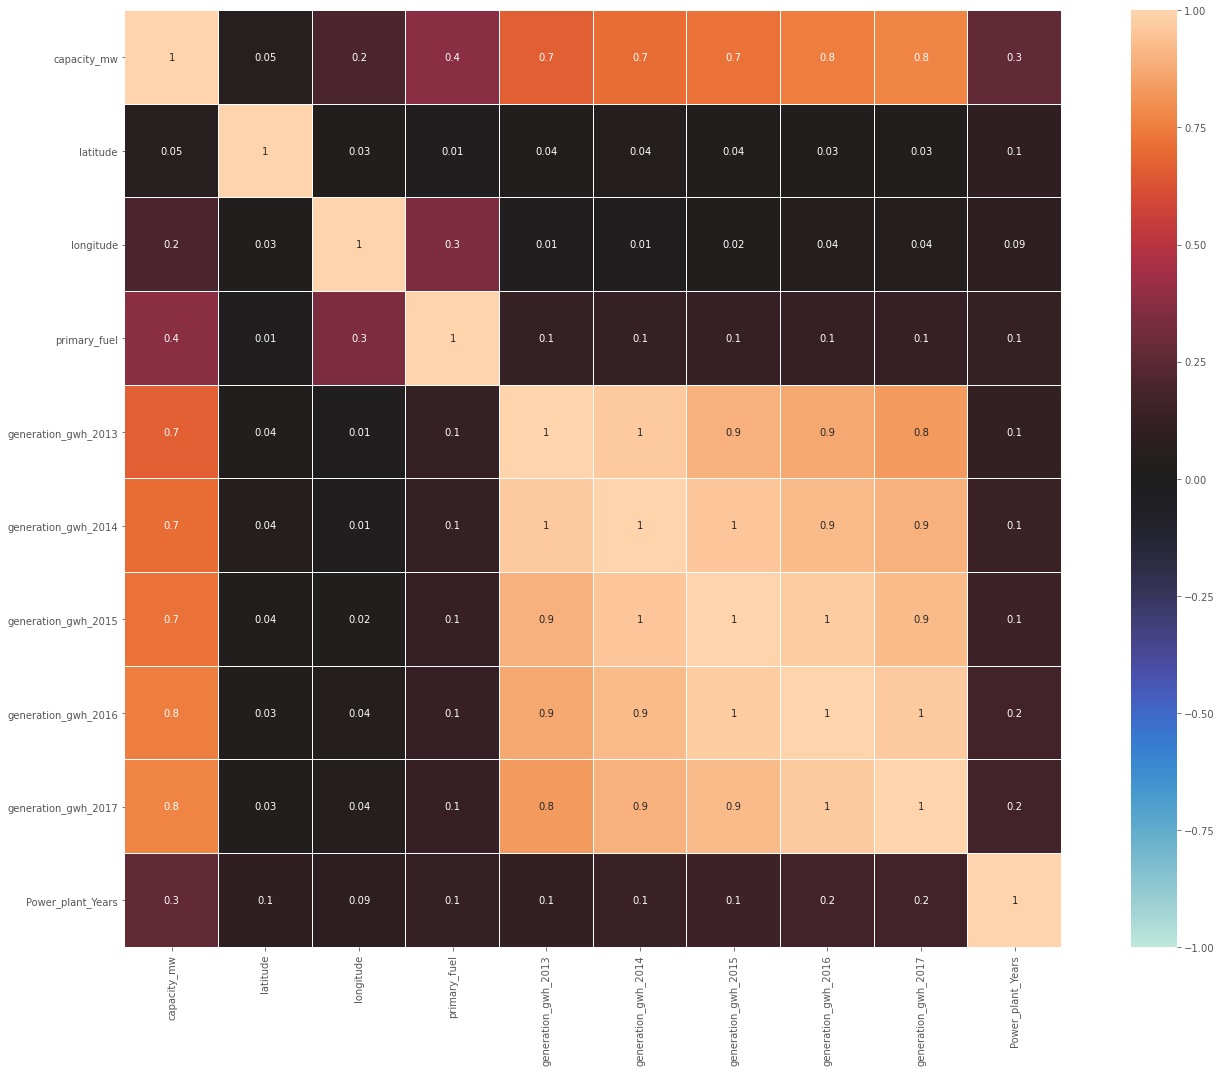

In [47]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

#### As shown in plot Power_plant_years are not having relationship with target variable and other input variables are almost having good relation with target variable.

## Find out which columns are positively and negatively correlated with each other

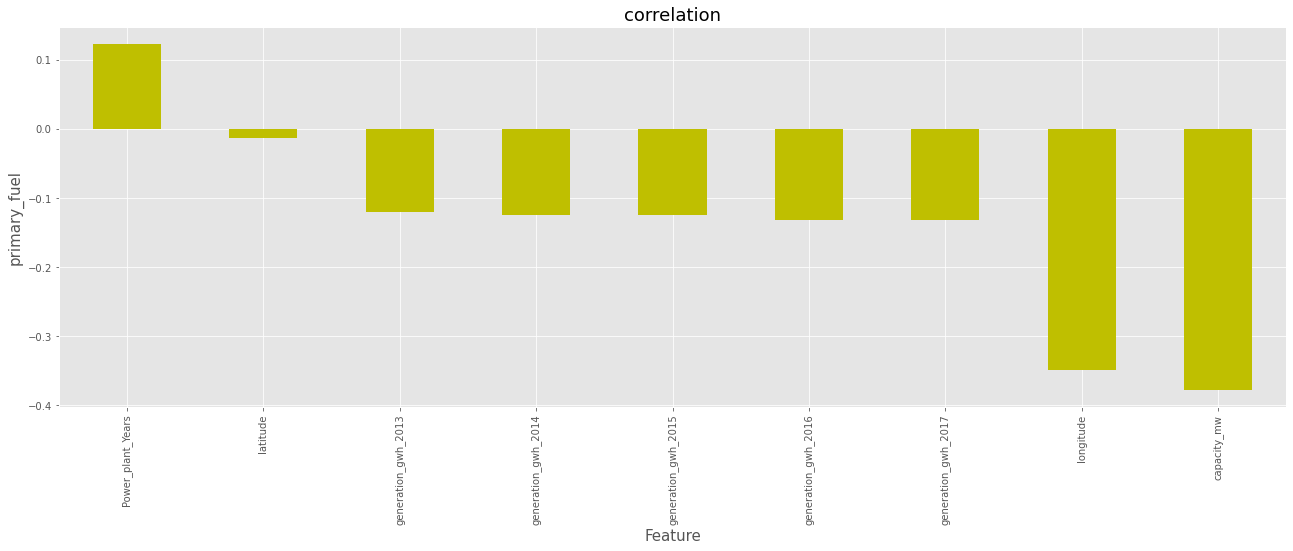

In [48]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('primary_fuel', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

#### From the above plot, we can see all features are negatively correlated with target variable. Only "Power-Plant-Years" has positive correlation in it.

# Outliers Removal

In [63]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_Years
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,3.205947,43.823789,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
std,580.221767,6.088110,4.781201,2.281339,44.624092,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,12.994825
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1.000000,22.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887,15.000000
50%,60.000000,21.278850,76.978950,3.000000,22.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
75%,388.125000,25.183775,79.211600,6.000000,29.250000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
max,4760.000000,34.649000,95.408000,7.000000,190.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,91.000000


In [67]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[['latitude','longitude','Power_plant_Years','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before         : (908, 11)
shape after          : (854, 11)
Percentage Loss      : 0.05947136563876652


#### Percentage Loss  : 7.5% data will loss after applying Zscore technique.

In [68]:
new_df.describe()

,capacity_mw,latitude,longitude,primary_fuel,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_Years
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000
mean,277.161488,21.095772,77.007289,3.262295,45.100703,2077.309031,2161.634080,2131.029136,2171.337711,2258.824007,20.206859
std,442.597377,6.110249,4.208855,2.326071,45.618112,1373.570489,1463.785752,1512.008568,1577.139604,1646.991085,11.240133
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,16.924050,74.275300,1.000000,22.000000,1434.515050,1261.939775,959.238050,936.745463,1001.702037,15.000000
50%,51.750000,21.196189,76.731700,3.000000,22.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
75%,345.375000,25.084300,78.923000,6.000000,41.750000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
max,2400.000000,34.649000,91.565000,7.000000,190.000000,8965.595000,9983.018000,10422.690000,10503.882000,9833.690000,60.000000


# Skewness

In [70]:
new_df.skew()

capacity_mw            2.126770
latitude              -0.106361
longitude              0.862421
primary_fuel           0.416510
source                 1.739843
generation_gwh_2013    1.545389
generation_gwh_2014    1.458480
generation_gwh_2015    1.331003
generation_gwh_2016    1.341657
generation_gwh_2017    1.275889
Power_plant_Years      0.855922
dtype: float64

We can see, some variables are skewed, whoes does not lie between -0.5 to +0.5 this range.

- commissioning_year
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017

### Let's check the datatype of skewed column, if they are categorical, than we don't need to remove skewness

In [71]:
new_df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
source                   int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
Power_plant_Years      float64
dtype: object

### Power transformation to remove skewness

In [74]:
#Apply yeo-johnson Power transformation to remove skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

new_df['longitude'] = scaler.fit_transform(new_df['longitude'].values.reshape(-1,1))
new_df['capacity_mw'] = scaler.fit_transform(new_df['capacity_mw'].values.reshape(-1,1))
new_df['Power_plant_Years'] = scaler.fit_transform(new_df['Power_plant_Years'].values.reshape(-1,1))
new_df['generation_gwh_2013'] = scaler.fit_transform(new_df['generation_gwh_2013'].values.reshape(-1,1))
new_df['generation_gwh_2014'] = scaler.fit_transform(new_df['generation_gwh_2014'].values.reshape(-1,1))
new_df['generation_gwh_2015'] = scaler.fit_transform(new_df['generation_gwh_2015'].values.reshape(-1,1))
new_df['generation_gwh_2016'] = scaler.fit_transform(new_df['generation_gwh_2016'].values.reshape(-1,1))
new_df['generation_gwh_2017'] = scaler.fit_transform(new_df['generation_gwh_2017'].values.reshape(-1,1))

In [75]:
new_df.skew()

capacity_mw            0.014107
latitude              -0.106361
longitude              0.007589
primary_fuel           0.416510
source                 1.739843
generation_gwh_2013    0.303599
generation_gwh_2014    0.292147
generation_gwh_2015    0.262847
generation_gwh_2016    0.244419
generation_gwh_2017    0.226903
Power_plant_Years      0.133865
dtype: float64

#### Skewness is removed from all continous column

# PreProcessing Pipeline:

### Seperating featuers and target:

In [76]:
x = new_df.drop(columns = 'primary_fuel', axis=1)
y = new_df['primary_fuel']

# Data Standardization

In [77]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scalar = sc.fit_transform(x)

#### Features are scaled.

# Variance inflation factor

In [78]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.430656,capacity_mw
1,1.035689,latitude
2,1.199226,longitude
3,1.264972,source
4,6.744539,generation_gwh_2013
5,9.000758,generation_gwh_2014
6,8.235354,generation_gwh_2015
7,10.666768,generation_gwh_2016
8,5.643080,generation_gwh_2017
9,1.169309,Power_plant_Years


#### To avoid multicolinearity, we will drop the column with maximum value(as many columns have value greater than 5)

In [79]:
new_df=new_df.drop(['generation_gwh_2016'], axis=1)

In [80]:
# let's do the process again to check VIF

x = new_df.drop(columns = 'primary_fuel', axis=1)
y = new_df['primary_fuel']

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scalar = ss.fit_transform(x)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.429092,capacity_mw
1,1.034882,latitude
2,1.194385,longitude
3,1.264743,source
4,6.697796,generation_gwh_2013
5,8.932418,generation_gwh_2014
6,5.492389,generation_gwh_2015
7,2.895320,generation_gwh_2017
8,1.160161,Power_plant_Years


In [81]:
#To avoid multicolinearity, let's do the process again to check VIF

new_df=new_df.drop(['generation_gwh_2014'], axis=1)

x = new_df.drop(columns = 'primary_fuel', axis=1)
y = new_df['primary_fuel']

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scalar = ss.fit_transform(x)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.429061,capacity_mw
1,1.031810,latitude
2,1.192898,longitude
3,1.264741,source
4,3.175091,generation_gwh_2013
5,4.599890,generation_gwh_2015
6,2.878892,generation_gwh_2017
7,1.159855,Power_plant_Years


#### vif value is not greater than 5 for any columns. so let's proceed further:

# Building Machine Learning Models

### Train test split

In [82]:
from sklearn.model_selection import train_test_split

x_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

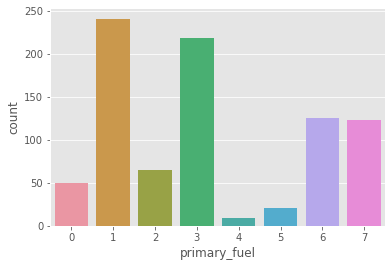

In [83]:
#visualization of target variable 
sn.countplot(new_df["primary_fuel"])
plt.show()


#### We can see there is imbalance in our target varibale, so we need to balance that with sampling otherwise the model will get bias.

# Oversampling

In [84]:
from imblearn.over_sampling import RandomOverSampler  #Random Over Sampler
ROS = RandomOverSampler()
x_res, y_res = ROS.fit_resample(x_scalar, y) # it will resample the data
print(y_res.value_counts()) # after this all classes will be balaned

0    241
1    241
2    241
3    241
4    241
5    241
6    241
7    241
Name: primary_fuel, dtype: int64


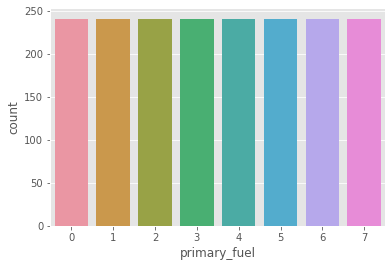

In [85]:
#visualization of target variable 
sn.countplot(y_res)
plt.show()

#### All classes are balanced, We can now proceed further:

In [86]:
# Finding best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=.25, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.9626556016597511 on Random_state  60


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, train_size=0.7, random_state = 60)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV


In [112]:
clfs = [ RandomForestClassifier(),LogisticRegression(),DecisionTreeClassifier(),AdaBoostClassifier()]

In [113]:
nfolds = 10
kf = KFold(n_splits=nfolds,random_state=60,shuffle=True)
maxAUC = -1
bestCL = ""
for cl in clfs:
    cl.fit(x_train, y_train)    
    cv =cross_val_score(cl,x_train,y_train,cv=kf).mean()
    pred_test=cl.predict(x_test)
    auc = accuracy_score(y_test,pred_test)
    
    print (str(cl) + ' ' + str(auc))
    print("CV Score: ", cv)
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
        
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

RandomForestClassifier() 0.9637305699481865
CV Score:  0.9303150912106137
[[74  0  0  0  0  0  0  0]
 [ 4 53  3  4  1  0  3  0]
 [ 0  2 67  0  0  0  0  0]
 [ 0  1  1 61  0  0  0  0]
 [ 0  0  0  0 72  0  0  0]
 [ 0  0  0  0  0 78  0  0]
 [ 1  1  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 82]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        74
           1       0.93      0.78      0.85        68
           2       0.94      0.97      0.96        69
           3       0.94      0.97      0.95        63
           4       0.99      1.00      0.99        72
           5       1.00      1.00      1.00        78
           6       0.96      0.97      0.97        73
           7       1.00      1.00      1.00        82

    accuracy                           0.96       579
   macro avg       0.96      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579

LogisticRegression() 0.6442141623488774
CV Score:  0.60126

#### Comparison of all model
- The difference between Cross validation score and logistic regression model is: 4%
- The difference between Cross validation score and Random Forest Classifier model is: 3%
- The difference between Cross validation score and Decision tree Classifier model is: 4%
- The difference between Cross validation score and AdaBoostClassifier() model is: 4%
#### Random Forest Classifier model is having minimum difference, soRandom Forest Classifier is best model

## Hyper parameter tunning

In [122]:
# Random Forest Classifier
param_grid = { 'n_estimators': [200, 500],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8,10,20],
                'criterion' :['gini', 'entropy']
             }

In [123]:
GCV=GridSearchCV(RandomForestClassifier(),param_grid,cv=3)

In [124]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [125]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [126]:
rfc1=RandomForestClassifier(random_state=60, max_features='sqrt', n_estimators= 200, max_depth=200, criterion='gini')

In [128]:
rfc1.fit(x_train, y_train)
pred =rfc1.predict(x_test)
print(accuracy_score(y_test, pred)*100)

96.89119170984456


#### We were able to raise the accuracy score  to: 96.89% after hyper parameter tunning 

## Boosting model with gradient boosting

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [130]:
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_train)


In [131]:
from sklearn import metrics
print('accuracy square score', metrics.accuracy_score(y_train, y_pred))

accuracy square score 1.0


#### Hurray! after boosting the model with gradient boosting, we achieved 100% accuracy score

# ROC AUC curve 

In [132]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [133]:
#All model score 

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test scores are saved.")

all model test scores are saved.


In [134]:
#logistic Regression
print("Logistic Regression :", roc_auc_score(y_test, lr.predict_proba(x_test), multi_class='ovr'))

#Random Forest Classifier
print("Random Forest Classifier", roc_auc_score(y_test, rf.predict_proba(x_test), multi_class='ovr'))

#Decision Tree Classifier
print("Decision Tree Classifier", roc_auc_score(y_test, dt.predict_proba(x_test), multi_class='ovr'))

Logistic Regression : 0.9152854805491383
Random Forest Classifier 0.9984771063583544
Decision Tree Classifier 0.9607885527178432


In [135]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state = 41)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred_cnb = rfc.predict(x_test)
y_prob_pred_rfc = rfc.predict_proba(x_test)


#predicting the data
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred_cnb = gnb.predict(x_test)
y_prob_pred_cnb = gnb.predict_proba(x_test)

In [136]:
y_pred_cnb = lr.predict(x_test)
y_prob_pred_lr = lr.predict_proba(x_test)


y_pred_cnb = dt.predict(x_test)
y_prob_pred_dt = dt.predict_proba(x_test)

## AUC ROC Curve

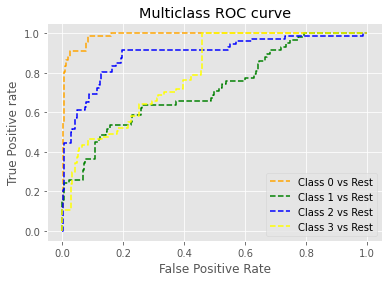

In [137]:
# roc curve for classes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

     Graph for Gaussian NB

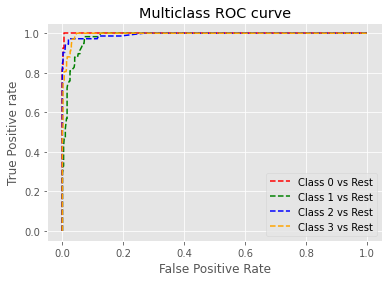

In [138]:
# roc curve for Random Forest
from sklearn.naive_bayes import GaussianNB, CategoricalNB
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_rfc[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='orange', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    


#### Graph for Random Forest

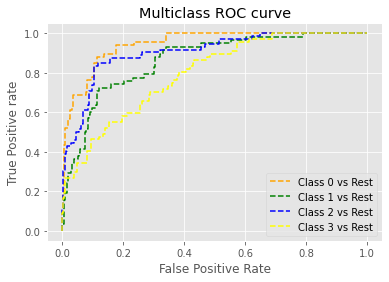

In [139]:
# roc curve for Logistic Regression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_lr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

#### Graph for Logistic Regression

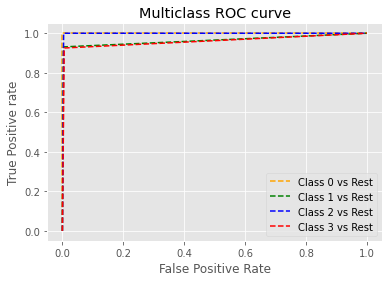

In [140]:
# roc curve for classes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_dt[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

#### Graph for decision tree classifier.

# Save the Model

In [142]:
import joblib
joblib.dump(rfc1,"globalpowerplant1.pkl")

['globalpowerplant1.pkl']

# Load the Model

In [145]:
Model = joblib.load("globalpowerplant1.pkl")
a = np.array(y_test)
prediction = Model.predict(x_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,5,5
2,5,5
3,1,1
4,4,4
...,...,...
574,3,3
575,3,3
576,5,5
577,3,3


## Hurray! Model Predicted with 100% Accuracy!!
# Let's go ahead and Predict the 2nd target variable
![next](https://animated-gif-creator.com/images/01/istp30_62.gif)

# MODEL 2- : capacity_mw is a target variable
![model2](https://assets.bouldercounty.org/wp-content/uploads/2018/05/junior-ranger-airplane.gif)


# Data Collection and Information

In [146]:
#Import the dataset

df= pd.read_csv("database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [147]:
#shape of data with number of rows and columns
df.shape

(908, 25)

# Exploratory Data Analysis

In [148]:
# Detailed description of stats
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [151]:
We have Float data type ----> latitude, longitude, other_fuel3, commissioning_year, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, estimated_generation_gwh, capacity_mw.

object datatypes ----> country, country_long, name, gppd_idnr, other_fuel1, other_fuel2, owner, source, url, geolocation_source, generation_data_source

all are independent variable accept capacity_mw. capacity_mw is target variable.# Datatypes of all columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

- Float data type ----> latitude, longitude, other_fuel3, commissioning_year, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, estimated_generation_gwh, capacity_mw.

- object datatypes ----> country, country_long, name, gppd_idnr, other_fuel1, other_fuel2, owner, source, url, geolocation_source, generation_data_source

- all are independent variable and capacity_mw. capacity_mw is target variable.

In [152]:
#check is there any null value present in any column

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

#### Lots of missing value in dataset. we need to treat tham

In [153]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

# EDA Concluding Remarks

1. There are 908 rows and 14 columns.
2. Dataset has more than 70% of null values in many columns which is replaced by mean and mode values.
3. Most of the features in the dataset is of the type float and three of them are of the type Object.
4. Dataset has many features that are skewed.
5. we have dropped some columns since it makes no difference in our model building.

# Data Visualization

### (Univariate analysis)

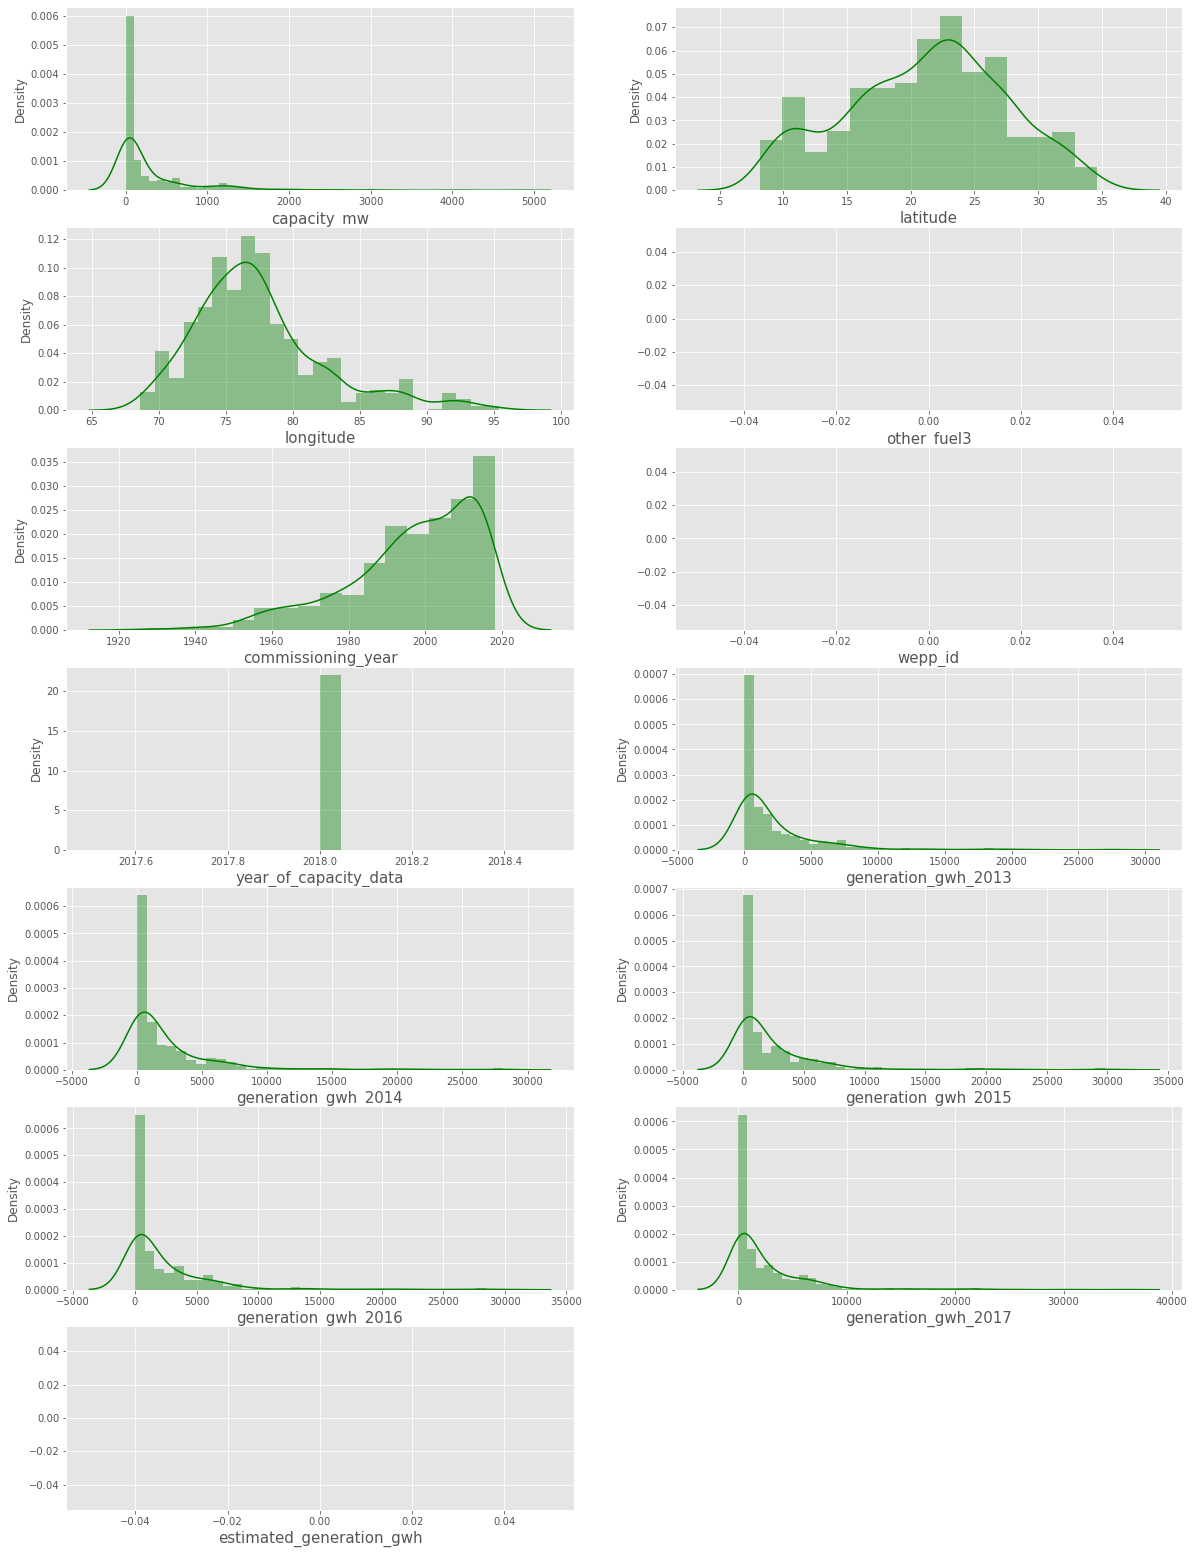

In [155]:
# Analysis through distplot

feat = df[['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'estimated_generation_gwh']]

#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in feat:
    if plotnumber <= 35: 
        ax = plt.subplot(15,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### Almost all the columns are skewed

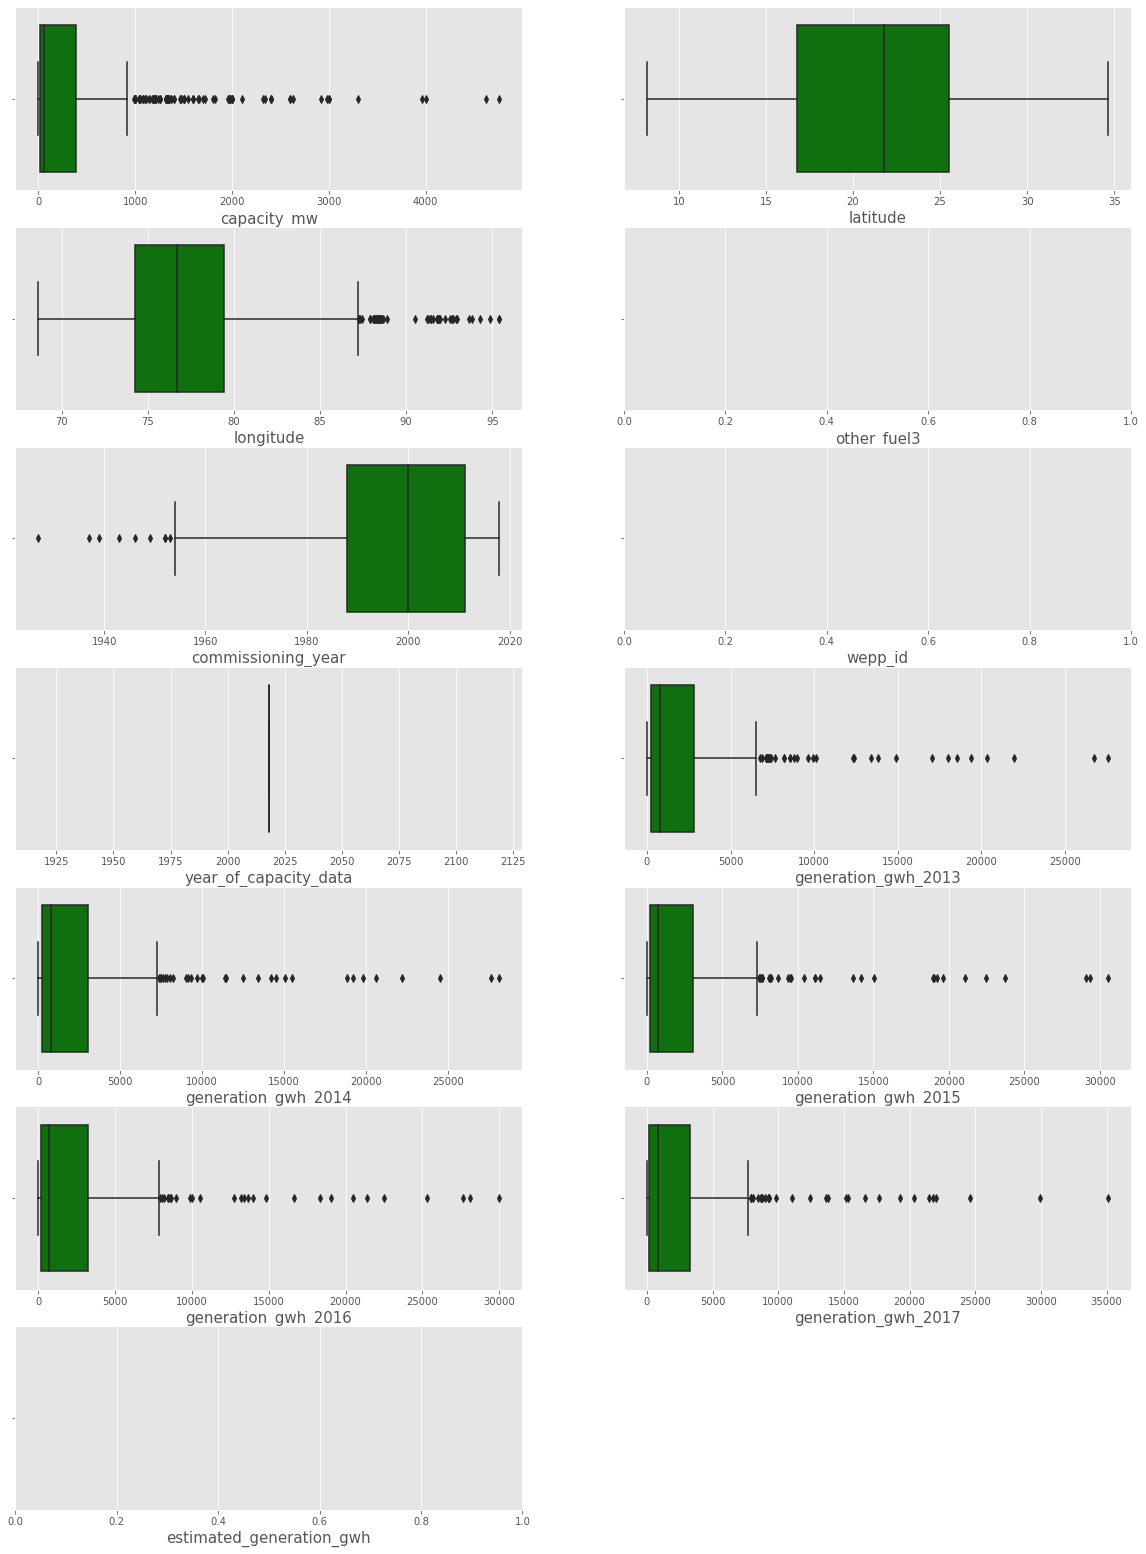

In [156]:
 #Analysis through boxplot
    
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in feat:
    if plotnumber <= 35: 
        ax = plt.subplot(15,2,plotnumber)
        sn.boxplot(feat[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### Almost all the column contains outliers.

### Bivariate analysis

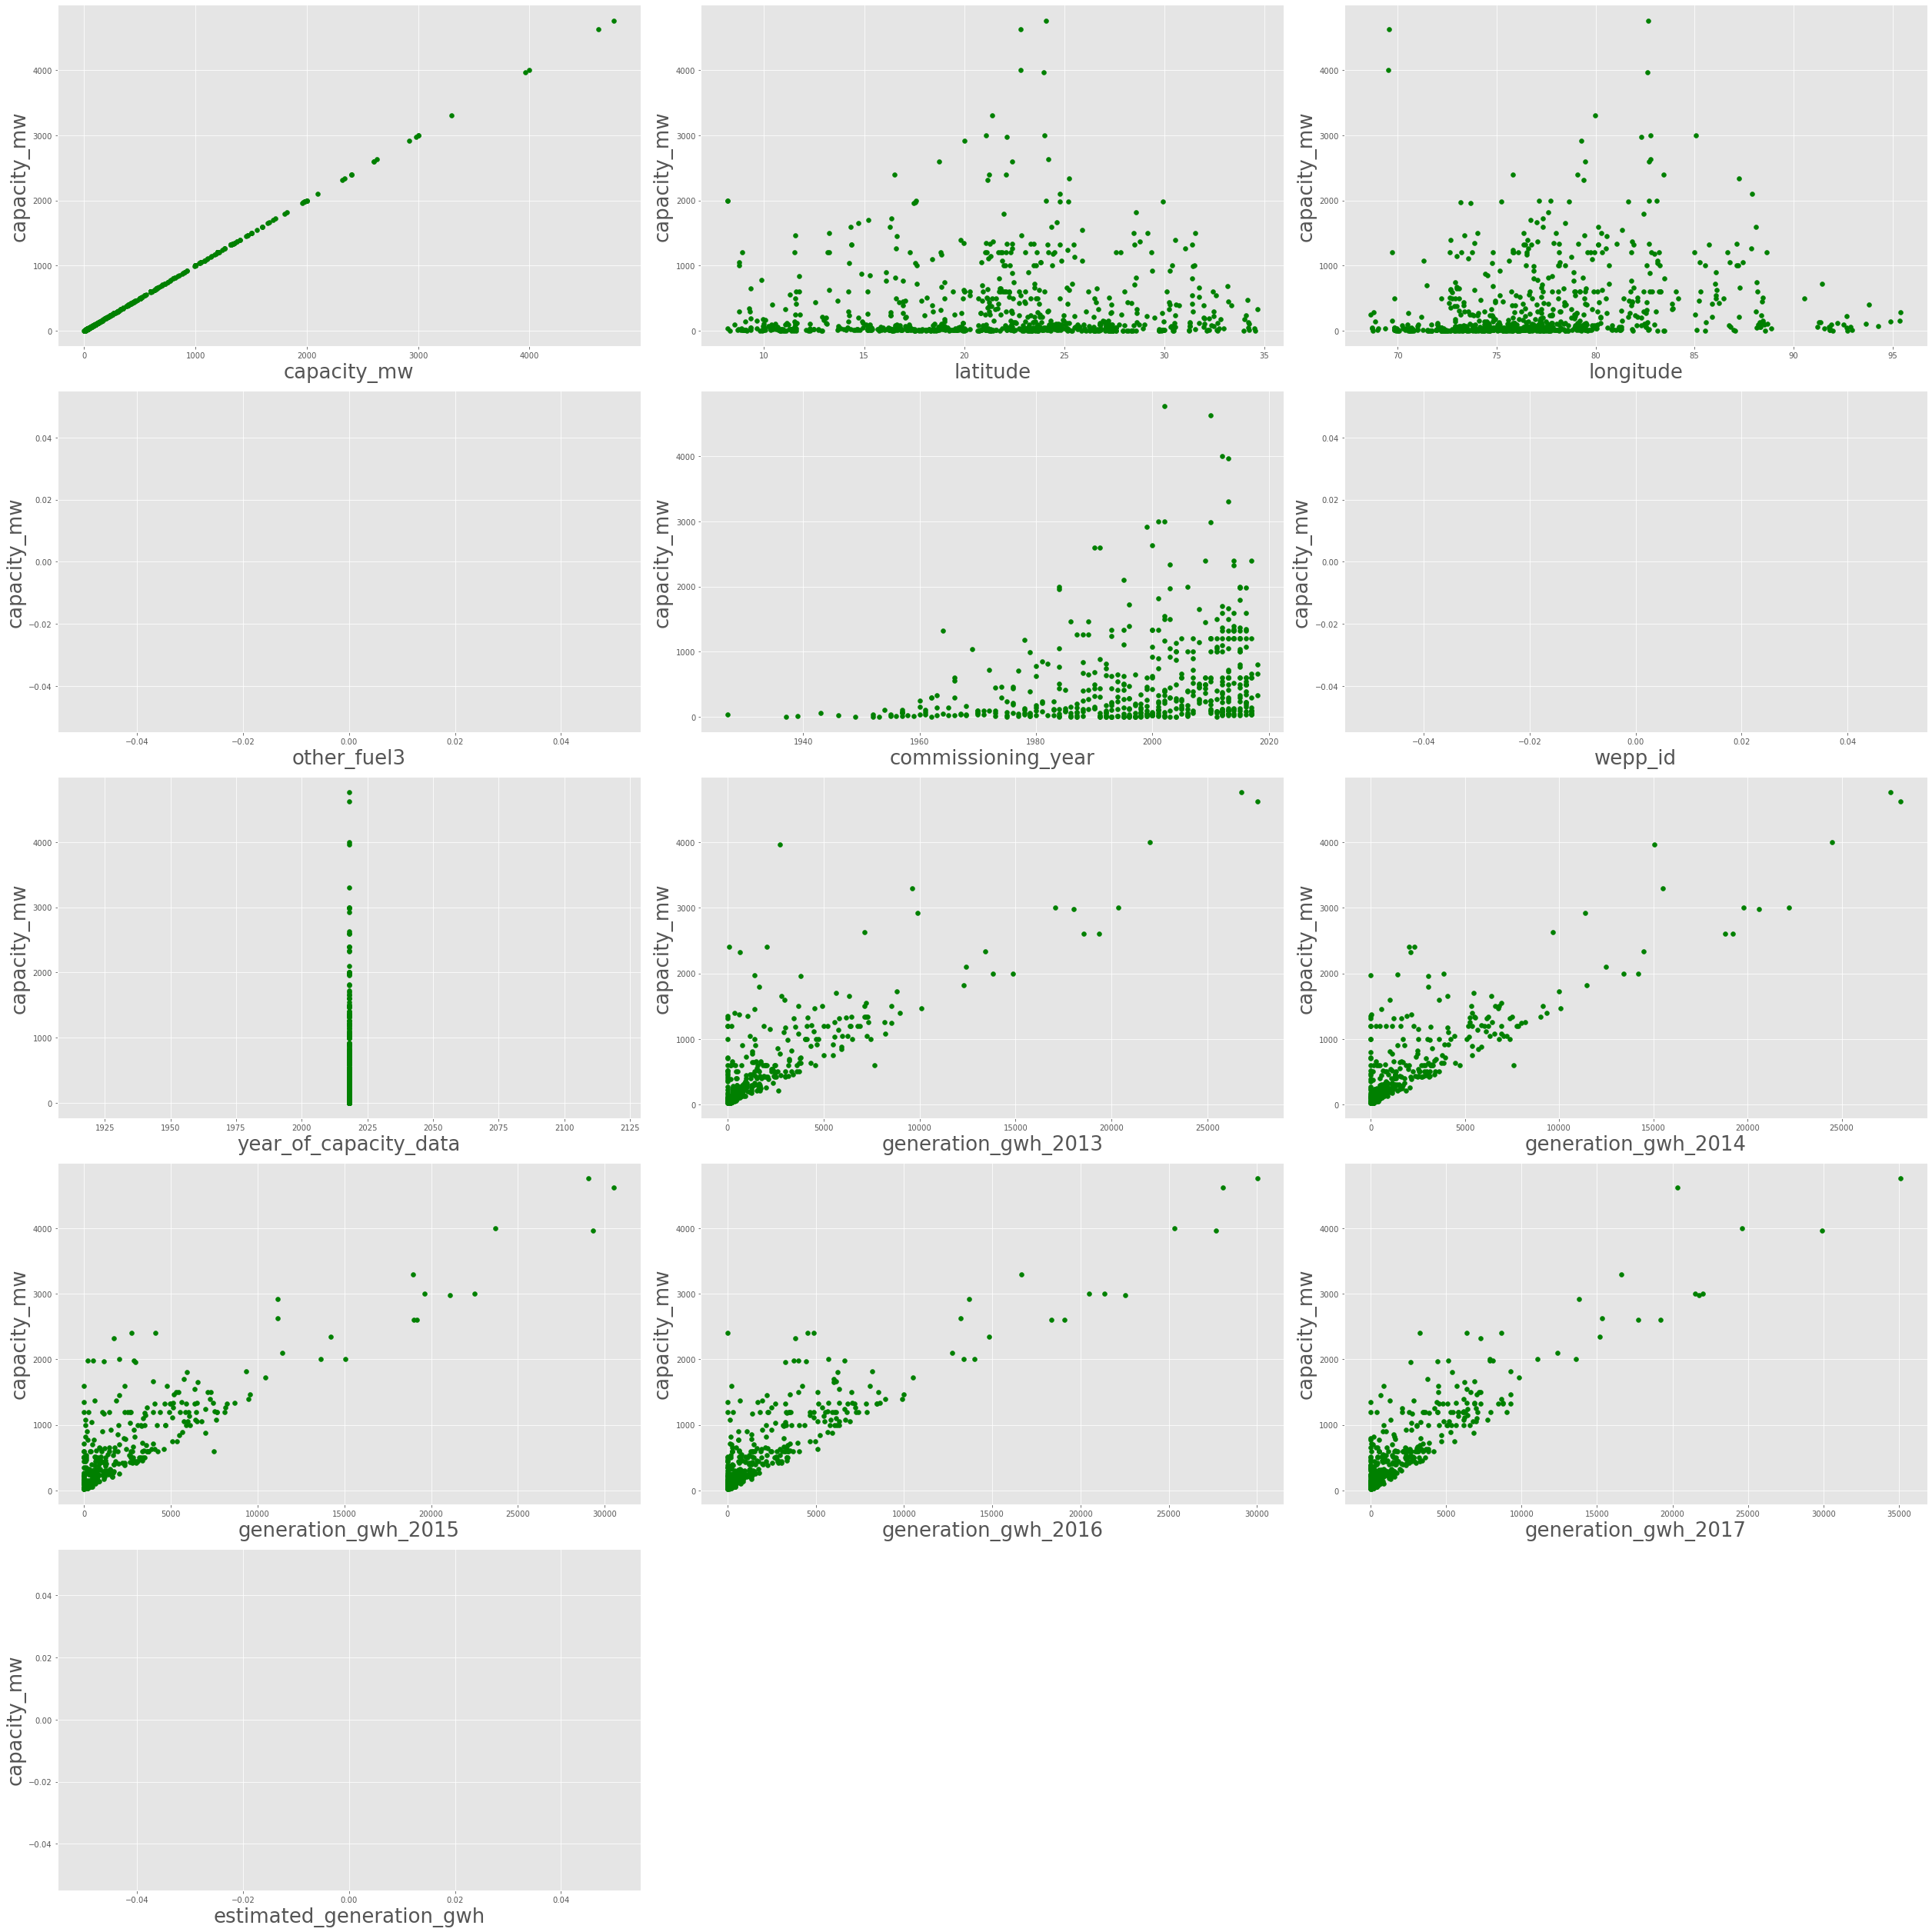

In [157]:
#Relationship Visualizing

plt.figure(figsize = (35,35), facecolor = 'white')
plotnumber = 1

for column in feat:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(feat[column],feat['capacity_mw'], color='g')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('capacity_mw', fontsize=26)
    plotnumber += 1
plt.tight_layout()

- Some variables are having some amount of linear relationship with target variable and some are having non linear relationship with target variable.
- Also,some outliers are also present in it.

### Multi Variate analysis

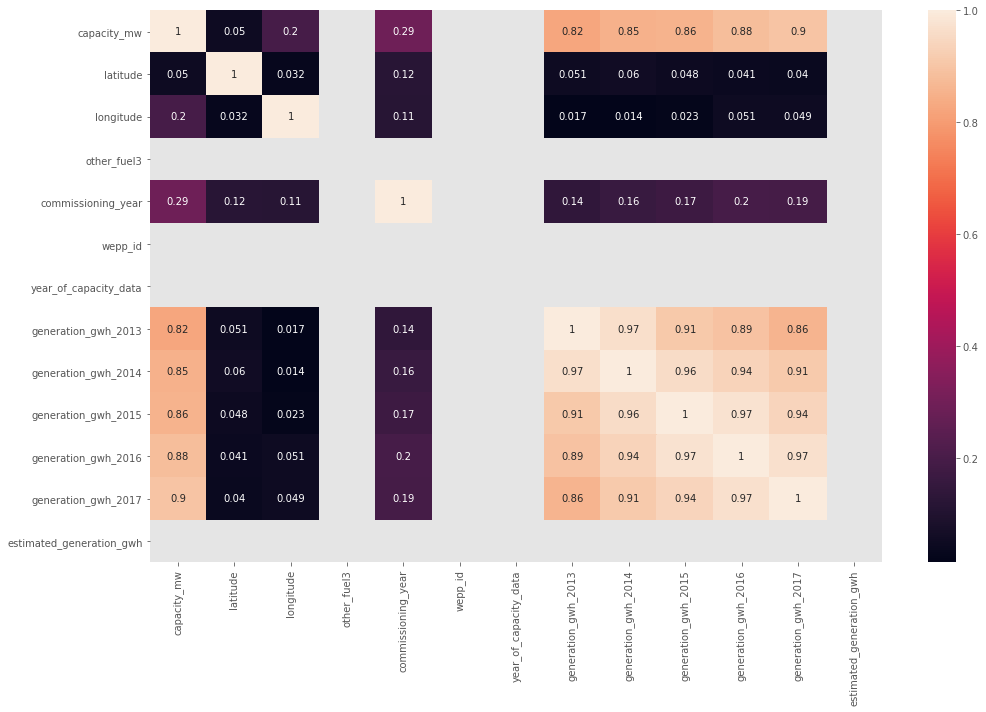

In [162]:
# heatmap

df_cor = df.corr().abs()
plt.figure(figsize = (15,10))
sn.heatmap(df_cor, annot=True)
plt.tight_layout()

#### 'latitude' are niether having good relationship nor good corelation with target variable.

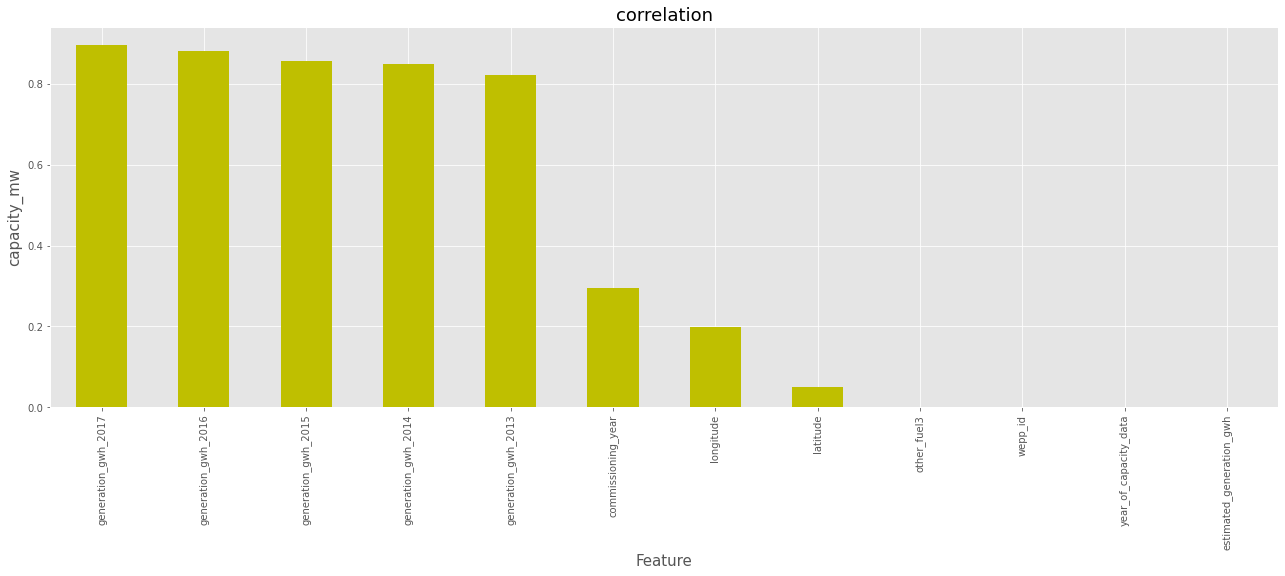

In [163]:
# columns are positively and negatively correlated with each other
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('capacity_mw', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()


- All the features are positively correlated with target variable. There are no negative correlation in it.
- We can drop that column, other_fuel3, wepp_id, year_of_capacity_data and estimated_generation_gwh as they are not having any correlation with target variable, 

# Data Imputation

In [164]:
#missing values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [165]:
# column url is not contributing to prediction, we will drop this column as well
# 'country','country_long' has same one value, so we will drop it.
# "year_of_capacity_data", 'latitude','longitude', it is having same entries through out, we can drop this column also
# other column have zero values, so we will drop it.
# let's dropping these columns beacuse they won't be impacted
df=df.drop(['latitude','longitude','country','country_long','name','gppd_idnr','generation_data_source','wepp_id','estimated_generation_gwh','other_fuel1','other_fuel2','other_fuel3','year_of_capacity_data','url'], axis=1)

In [166]:
#lets use commissioning_year to know how old the power plant is and make a column Power_plant_Years
df['Power_plant_Years'] = 2018 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)


In [168]:
# let's fill the continous column with the mean.
df=df.fillna(df.mean())

# check for any null values
df.isnull().sum()

capacity_mw              0
primary_fuel             0
owner                  566
source                   0
geolocation_source      19
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
Power_plant_Years        0
dtype: int64

In [169]:

# fill na of geolocation_source and Owner with the mode
df['geolocation_source']= df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['owner']= df['owner'].fillna(df['owner'].mode()[0])

In [170]:
# check for any null values
df.isnull().sum()

capacity_mw            0
primary_fuel           0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
Power_plant_Years      0
dtype: int64

#### we have no missing values now.

### Label Encoding

In [171]:
df.dtypes

capacity_mw            float64
primary_fuel            object
owner                   object
source                  object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
Power_plant_Years      float64
dtype: object

In [172]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [173]:
df.dtypes

capacity_mw            float64
primary_fuel             int32
owner                    int32
source                   int32
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
Power_plant_Years      float64
dtype: object

####  All columns are encoded now.

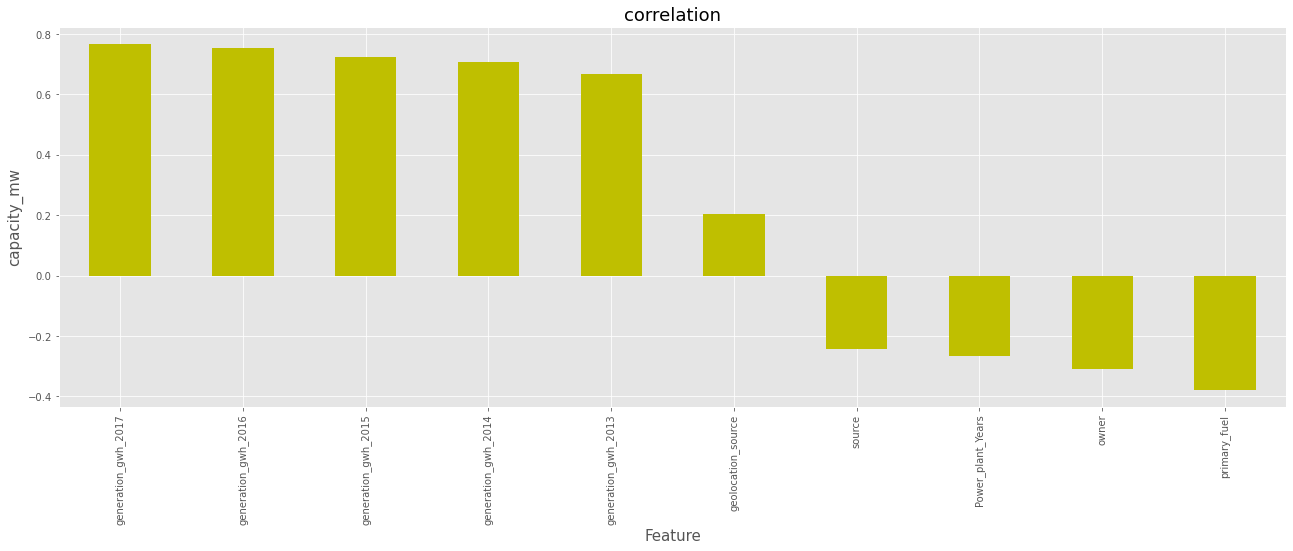

In [174]:
# Visualization of all input variables correlation with targate variable after encoding

plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('capacity_mw', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()


# Outliers Removal

In [175]:
#In Zscore technique taking standard deviation 3

from scipy.stats import zscore

z_score= zscore(df[['Power_plant_Years','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before and after
shape before         : (908, 11)
shape after          : (872, 11)
Percentage Loss      : 0.039647577092511016


#### 3.9% data loss after applying Zscore technique.

In [176]:
new_df.describe()

,capacity_mw,primary_fuel,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_Years
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,273.709130,3.255734,58.223624,44.724771,1.722477,2058.379073,2141.287951,2111.972100,2151.790069,2233.118462,20.247454
std,438.896922,2.305579,83.518324,45.311322,0.688464,1371.384939,1461.797064,1508.033517,1572.423430,1644.686915,11.255458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,1.000000,5.000000,22.000000,2.000000,1347.190637,1198.649138,891.532362,860.903850,863.733687,15.000000
50%,54.250000,3.000000,5.000000,22.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
75%,330.000000,6.000000,104.250000,38.250000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
max,2400.000000,7.000000,279.000000,190.000000,2.000000,8965.595000,9983.018000,10422.690000,10503.882000,9833.690000,60.000000


# Skewness

In [177]:
new_df.skew()

capacity_mw            2.157428
primary_fuel           0.428561
owner                  1.304824
source                 1.764384
geolocation_source    -2.093441
generation_gwh_2013    1.540752
generation_gwh_2014    1.453808
generation_gwh_2015    1.333997
generation_gwh_2016    1.346496
generation_gwh_2017    1.280999
Power_plant_Years      0.829964
dtype: float64

#### Variables whoes value is not lies between -0.5 to +0.5 this range are skewed. 

In [179]:
# Power transformation to remove skewness

#applying log transformation on skewed columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

new_df['Power_plant_Years'] = scaler.fit_transform(new_df['Power_plant_Years'].values.reshape(-1,1))
new_df['generation_gwh_2013'] = scaler.fit_transform(new_df['generation_gwh_2013'].values.reshape(-1,1))
new_df['generation_gwh_2014'] = scaler.fit_transform(new_df['generation_gwh_2014'].values.reshape(-1,1))
new_df['generation_gwh_2015'] = scaler.fit_transform(new_df['generation_gwh_2015'].values.reshape(-1,1))
new_df['generation_gwh_2016'] = scaler.fit_transform(new_df['generation_gwh_2016'].values.reshape(-1,1))
new_df['generation_gwh_2017'] = scaler.fit_transform(new_df['generation_gwh_2017'].values.reshape(-1,1))

In [180]:
new_df.skew() #  no need to remove skewness from  catogorical column variable

capacity_mw            2.157428
primary_fuel           0.428561
owner                  1.304824
source                 1.764384
geolocation_source    -2.093441
generation_gwh_2013   -0.175430
generation_gwh_2014   -0.252884
generation_gwh_2015   -0.317480
generation_gwh_2016   -0.318769
generation_gwh_2017   -0.334109
Power_plant_Years      0.002984
dtype: float64

#### Skewness is removed

# Preprocessing Pipeline

In [181]:
# Seperating the columns into featuers and target:

x = new_df.drop(columns = 'capacity_mw', axis=1)
y = new_df['capacity_mw']

# Data Standardization

In [182]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [183]:
# Variance inflation factor

#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif


,vif,Features
0,1.824961,primary_fuel
1,3.149966,owner
2,3.725319,source
3,2.036515,geolocation_source
4,6.564399,generation_gwh_2013
5,8.451534,generation_gwh_2014
6,7.740621,generation_gwh_2015
7,10.222542,generation_gwh_2016
8,5.237611,generation_gwh_2017
9,1.086362,Power_plant_Years


In [184]:
# VIF value is greater than 10 in one column, we will drop maximum value column to avoid multiclinearity issue.

new_df=new_df.drop(['generation_gwh_2016'], axis=1)

In [185]:
# Seperating the columns into featuers and target:

x = new_df.drop(columns = 'capacity_mw', axis=1)
y = new_df['capacity_mw']

In [186]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [187]:
# Variance inflation factor

#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.824706,primary_fuel
1,3.148663,owner
2,3.724945,source
3,2.036142,geolocation_source
4,6.523809,generation_gwh_2013
5,8.436147,generation_gwh_2014
6,5.221622,generation_gwh_2015
7,2.910911,generation_gwh_2017
8,1.071262,Power_plant_Years


#### Good to proceed, as all the columns have VIF less than 10

# Building Machine Learning Models

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [189]:
# Finding the best random state

from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.7709936208709286 on Random_state  84


In [190]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 84)

## Linear Regression Model


In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Lr=LinearRegression()
Lr.fit(x_train, y_train)
pred_test=Lr.predict(x_test)
print("R2 Score:", r2_score(y_test,pred_test))

cv_score= cross_val_score(Lr, x, y, cv=5).mean()
print("CV :", cv_score)

R2 Score: 0.5010326291359213
CV : 0.451842838903535


In [194]:
# Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [195]:
ls = Lasso(alpha = 10, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.4941616207520161

In [196]:
cv_score= cross_val_score(ls, x, y, cv=5).mean()
cv_score

0.4704481847588233

#### The r2 score for linear regression model is : 50%
#### Cross validation score for linear regression is : 47%

## Decision Tree Regressor

In [197]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

pred_dtree = dtree.predict(x_test)
print(r2_score(y_test,pred_dtree))

cv_score= cross_val_score(dtree, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.659216971662795


0.5808186296451527

#### The r2 score for DT model is : 65.9%
#### Cross validation score for DT is : 58%

## Random Forest Regression

In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)


{'criterion': 'mse', 'max_features': 'log2'}


In [199]:

Rfr =RandomForestRegressor(criterion = "mse", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  78.22358979319061
Cross Val Score:  77.94360799008128


- The r2 score for linear regression model is : 78.2%
- Cross validation score for linear regression is : 77.94%

### Compare all models
- The diffrence between r2 score and cross validation score of linear regression model is : 3%

- The diffrence between r2 score and cross validation score Random Forest Regressor model is : .3%

- The diffrence between r2 score and cross validation score of Decision Tree Regressor model is : 7%

#### So, best model is Random Forest Regressor.

# Hyper parameter tunning

In [200]:
#Random forest Classifier

Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

In [202]:
GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)


In [ ]:
GCV.fit(x_train, y_train)

In [ ]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

In [207]:
mod = RandomForestRegressor( criterion='mse', max_depth=20, max_features='log2', n_estimators= 200)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

78.52074298239256


#### after hyper parameter tuning Random Forest Regressor value is 78.5%
## Boosting of model with Gradient Boosting

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
gdr = GradientBoostingRegressor()

gdr.fit(x_train, y_train)
y_pred = gdr.predict(x_train)

from sklearn import metrics
print('r2 score', metrics.r2_score(y_train, y_pred))

r2 score 0.9394150278961407


#### After boosting the r2 score will be : 93.94%

# Save the model

In [209]:
import joblib
joblib.dump(mod,"globalpowerplant2.pkl")

['globalpowerplant2.pkl']

# Load the model

In [211]:
Model = joblib.load("globalpowerplant2.pkl")
a = np.array(y_test)
prediction = Model.predict(x_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,48.00,55.201330
1,20.00,25.575000
2,1700.00,1048.100000
3,10.00,12.770750
4,50.40,43.177835
...,...,...
170,45.00,79.391100
171,1967.08,1069.358855
172,113.60,43.177835
173,22.00,18.108542


#### Yay! we predicted the model with 94% accuracy!!

 # Concluding Remarks
 
### In this project we build  two models one defining the "Fuel Type" attribute of our database based on common fuel categories, with 100% accuracy and the other model defining "Megawatts Capacity" based on electrical generating capacity in megawatts with 94% accuracy.

![save](https://us.sunpower.com/sites/default/files/brand-225-savemore-landingpage-551x310_0.gif)